In [1]:
source('../../functions.R')
tcelle = readRDS('Data/tcell_e.RDS')
tcelld = readRDS('Data/tcell_d.RDS')
setwd('Figures/Figure 3')

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object

In [2]:
ggthemes_data[['tableau']][['color-palettes']]$regular$`Tableau 20`$value

[1] "#4E79A7" "#A0CBE8" "#F28E2B" "#FFBE7D" "#59A14F" "#8CD17D" "#B6992D"
 [8] "#EDC948" "#E15759" "#76B7B2" "#F1CE63" "#499894" "#86BCB6" "#E15759"
[15] "#FF9D9A" "#79706E" "#BAB0AC" "#D37295" "#FABFD2" "#B07AA1" "#D4A6C8"
[22] "#9D7660" "#D7B5A6"

In [3]:
fctlvs =levels(factor((c(tcelld@meta.data$plot_cluster, tcelle@meta.data$plot_cluster))))
#pheno_palette =rev(ggthemes_data[['tableau']][['color-palettes']]$regular$`Tableau 10`$value[c(3,4,13,14,7:14)])#[c(2,4,6,8,10,12,1,3,5,7,9,11)]#brewer.pal(12, 'Paired')



pheno_palette =c(ggthemes_data[['tableau']][['color-palettes']]$regular$`Miller Stone`$value[1:6],
    ggthemes_data[['tableau']][['color-palettes']]$regular$`Superfishel Stone`$value[1:6])#[c(2,4,6,8,10,12,1,3,5,7,9,11)]#brewer.pal(12, 'Paired')

names(pheno_palette) = fctlvs



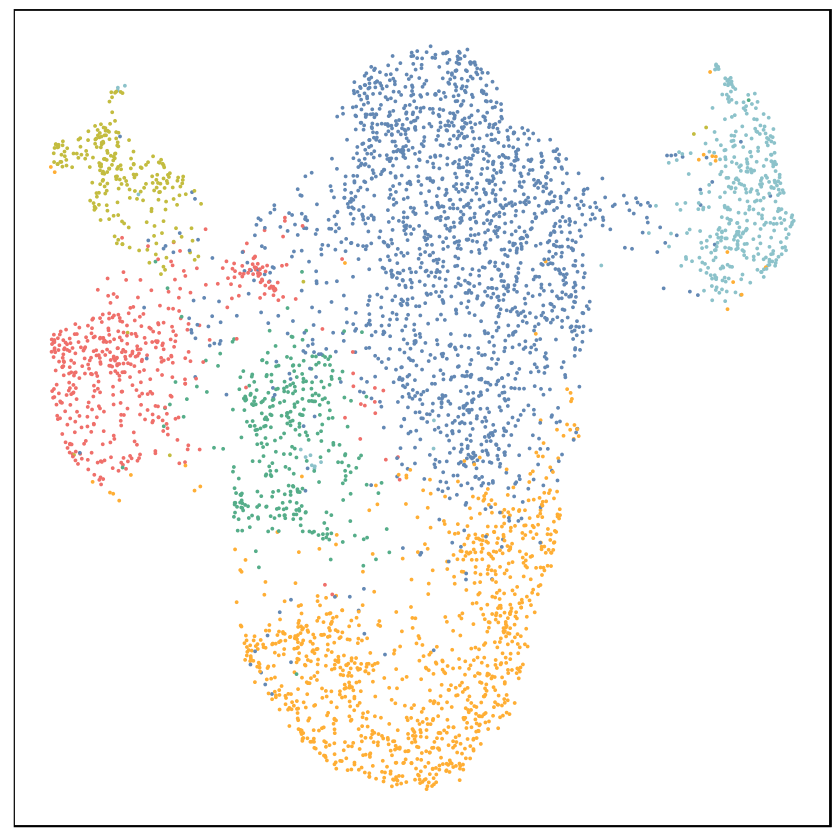

In [4]:
tcelle = addUMAP(tcelle)
data = tcelle@meta.data
data = data[sample(rownames(data), length(rownames(data))),]
ggplot(data, aes(x = UMAP1, y = UMAP2, color = plot_cluster)) + geom_point(size = 0.01) + UMAP_theme + 
scale_color_manual(values = pheno_palette)
ggsave('eso_t_umap.eps', height = 1.75, width = 1.75)

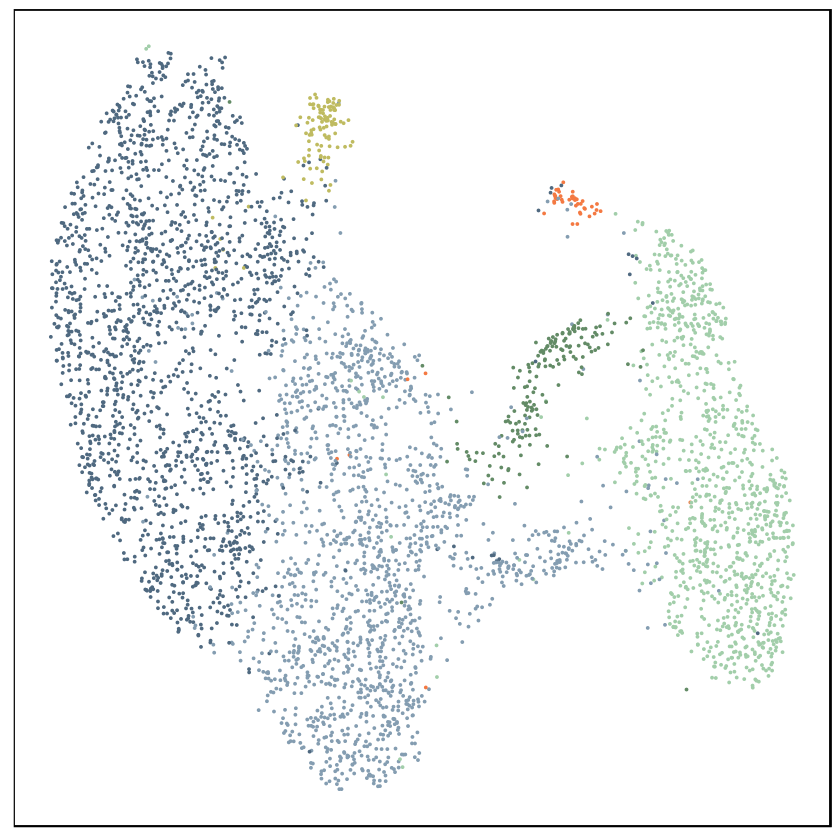

In [5]:
tcelld = addUMAP(tcelld)
data = tcelld@meta.data
data = data[sample(rownames(data), length(rownames(data))),]
ggplot(data, aes(x = UMAP1, y = UMAP2, color = plot_cluster)) + geom_point(size = 0.01) + UMAP_theme + 
scale_color_manual(values = pheno_palette)
ggsave('duo_t_umap.eps', height = 1.75, width = 1.75)

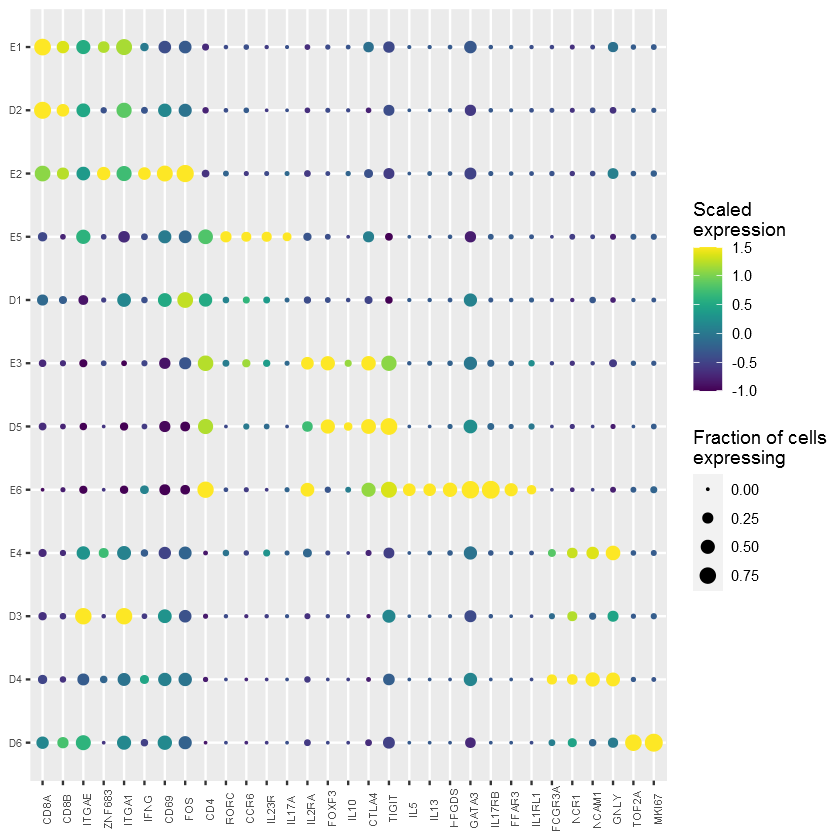

In [6]:
tcr = MergeSeurat(tcelle, tcelld)
genes = c( "CD8A", "CD8B", 
           "ITGAE", "ZNF683", "ITGA1", 
           "IFNG", "CD69","FOS",
           "CD4", 'RORC', 'CCR6', 'IL23R', 'IL17A',
          "IL2RA", "FOXP3", "IL10", "CTLA4", 'TIGIT', 
           'IL5', 'IL13', 'HPGDS', 'GATA3', 'IL17RB','FFAR3','IL1RL1',
          "FCGR3A", "NCR1", "NCAM1", 'GNLY', 
         'TOP2A', 'MKI67')

pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = as.data.frame(t(as.matrix(tcr@data[genes,])))
data$phenotype = tcr@meta.data$plot_cluster
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame()
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] = 1.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of cells\nexpressing')  + scale_y_discrete(limits = rev(c('E1', 'D2', 'E2', 'E5', 'D1', 'E3', 'D5', 'E6', 'E4',  'D3', 'D4', 'D6'))) + 
scale_x_discrete(limits = genes) + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 6, angle = 90), axis.text.y = element_text(size = 6)) + scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75))
#ggsave('markergenes.eps', width = 6, height =3)
ggsave('markergenes.pdf', width = 5.4, height =3.7, useDingbats = FALSE)

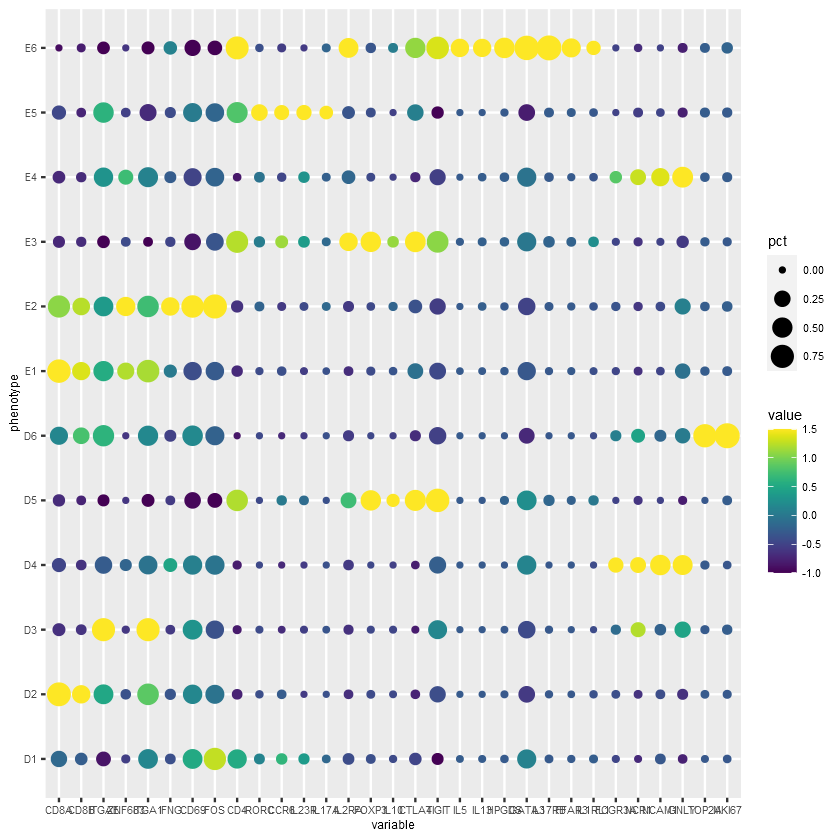

In [7]:
library(ggplot2)
ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis() + Axis_themes

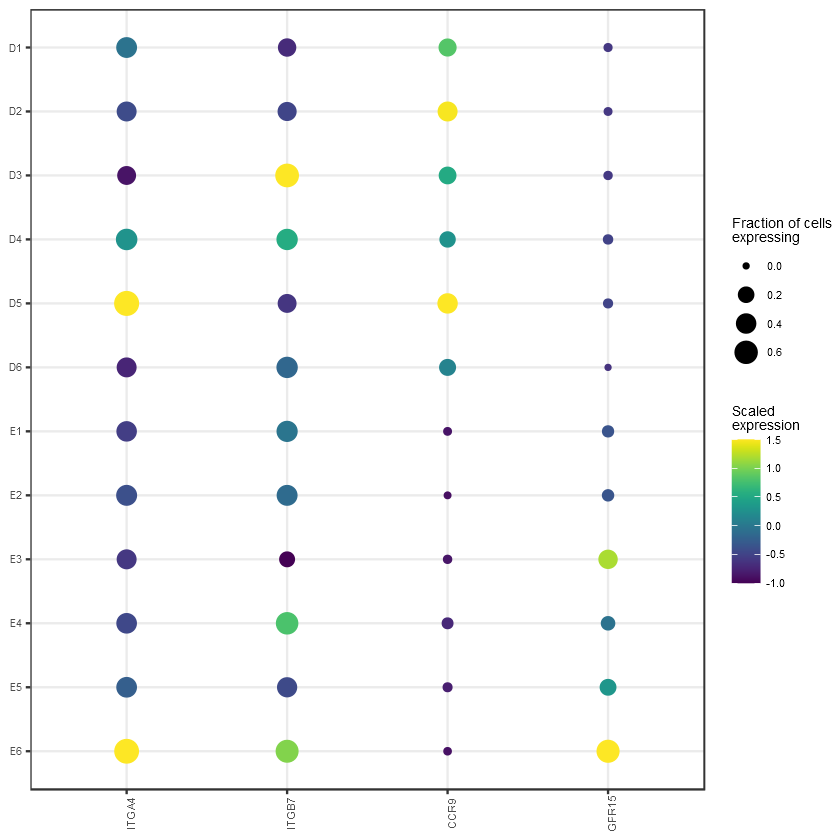

In [8]:
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
genes = c('ITGA4', 'ITGB7', 'CCR9', 'GPR15')
data = as.data.frame(t(as.matrix(tcr@data[genes,])))
data$phenotype = tcr@meta.data$plot_cluster
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame()
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1.5] = 1.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)
#df_exp$value[is.nan(df_exp$value)] = 0

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of cells\nexpressing')   +  scale_x_discrete(limits = genes) + Axis_themes + 
theme(axis.title = element_blank()) + scale_y_discrete(limits = rev(levels(factor(df_exp$phenotype))))
ggsave('homing.pdf', useDingbats = FALSE, height = 2.5, width = 2)

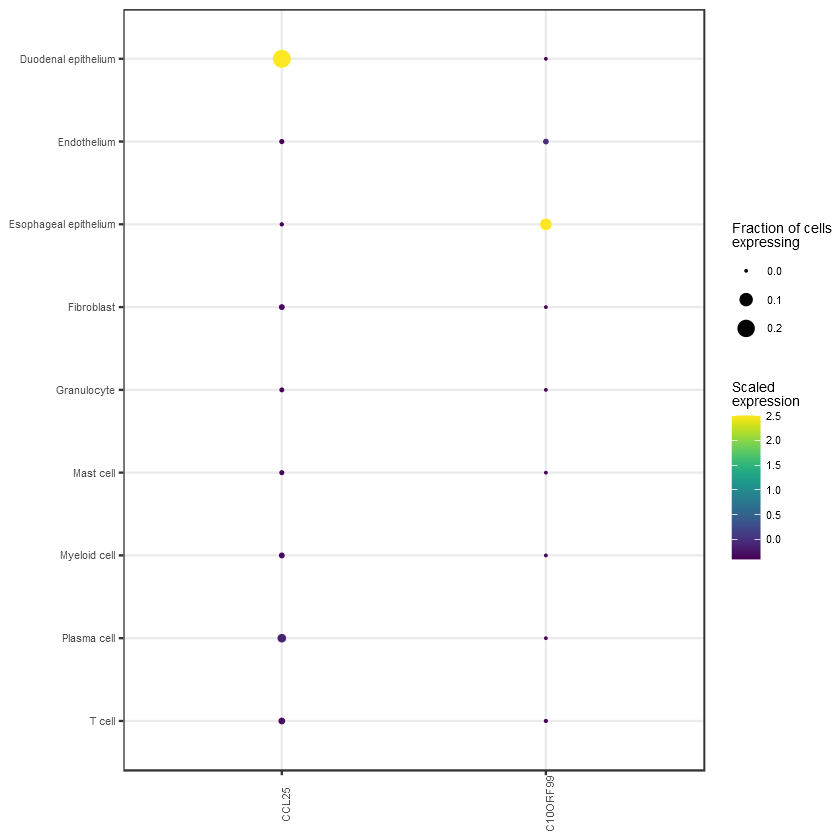

In [9]:
seurat = readRDS('../../Data/tissue_seurat.RDS')
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
genes = c("CCL25", 'C10ORF99')
data = as.data.frame(t(as.matrix(seurat@data[genes,])))
data$phenotype = seurat@meta.data$phenotype
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame()
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 2.5] = 2.5
df_exp$value[df_exp$value < -1]= -1
df_exp$pct = df_pct$value
df_exp$value = as.vector(df_exp$value)
#df_exp$value[is.nan(df_exp$value)] = 0

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of cells\nexpressing') +  scale_x_discrete(limits = genes) + Axis_themes + 
theme(axis.title = element_blank()) + scale_y_discrete(limits = rev(levels(factor(df_exp$phenotype)))) + scale_size_continuous(range = c(.01, 4), breaks = c(0,.1, .2))
ggsave('ligands.pdf', useDingbats = FALSE, height = 2.5, width = 2.5)

In [10]:
tcr = SetAllIdent(tcr, 'plot_cluster')
cd4mark_de = FindMarkers(tcr, 'E5', 'D1', test.use = 'wilcox', logfc.threshold = 0)
cd8mark_de = FindMarkers(tcr, c("E1", 'E2'), 'D2', test.use = 'wilcox', logfc.threshold = 0)
tregmark_de = FindMarkers(tcr, 'E3', 'D5', logfc.threshold = 0, test.use = 'wilcox')

In [11]:
tcr = seuratProcess(tcr)
tcr = RunUMAP(tcr, dims.use = 1:10)
tcr = addUMAP(tcr)

Regressing out: n_genes



Time Elapsed:  32.5176448822021 secs

Scaling data matrix


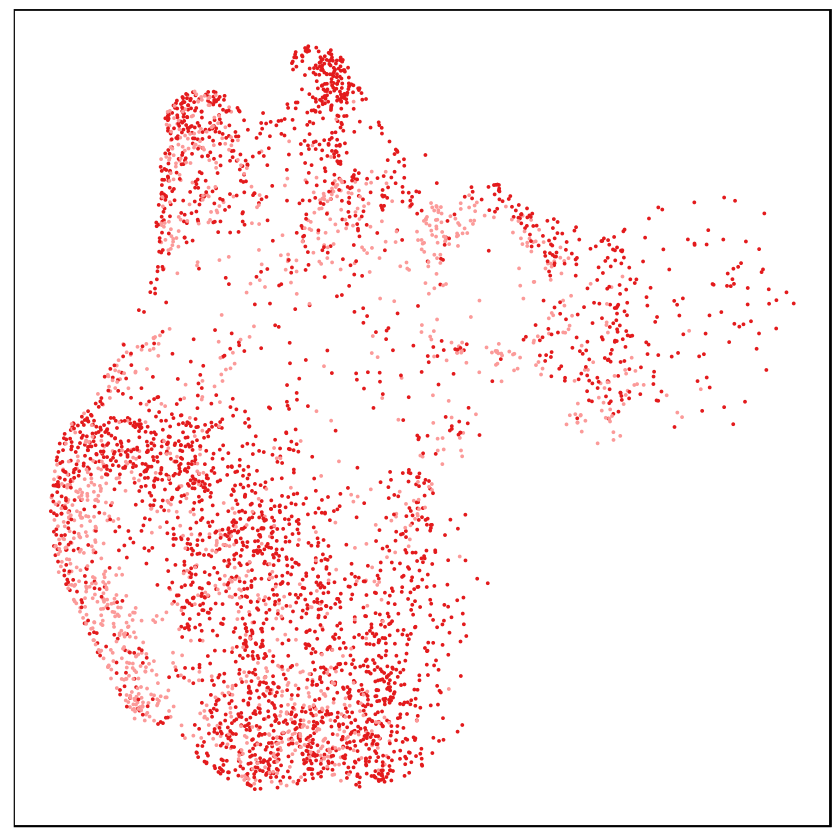

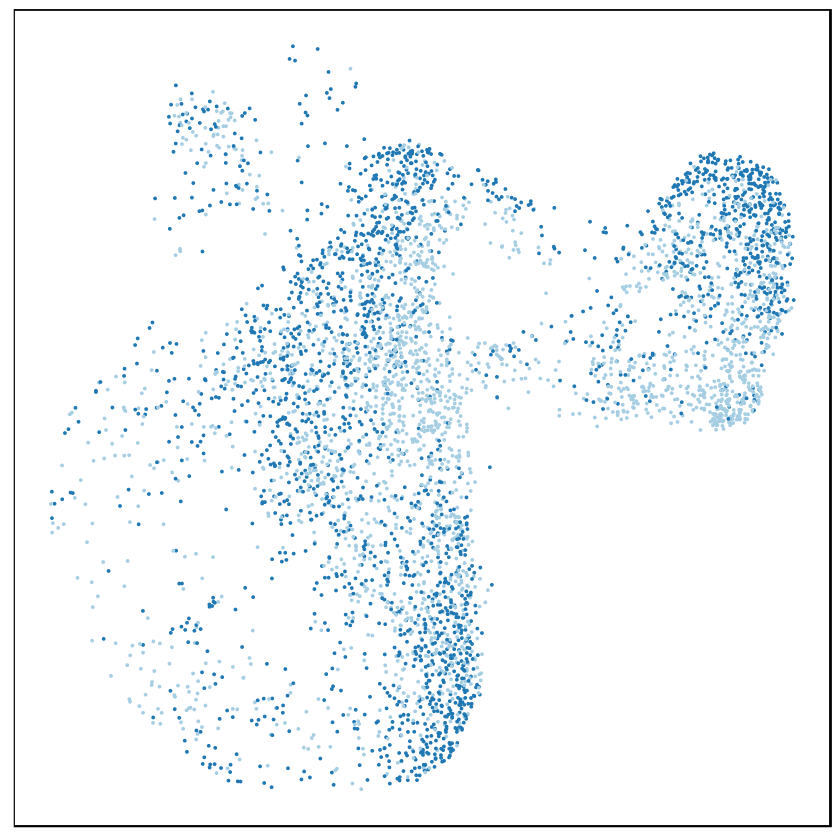

In [12]:
ggplot(tcr@meta.data %>% filter(tissue == 'Esophagus'), aes(x = UMAP1, y = UMAP2, color= ci)) + geom_point(size = .01) + UMAP_theme + scale_color_manual(values= tissue_palette)
ggsave('mixed_tissue_eso.pdf', height = 2, width =2 , useDingbats = FALSE)

ggplot(tcr@meta.data %>% filter(tissue == 'Duodenum'), aes(x = UMAP1, y = UMAP2, color= ci)) + geom_point(size = .01) + UMAP_theme + scale_color_manual(values= tissue_palette)
ggsave('mixed_tissue_duo.pdf', height = 2, width =2 , useDingbats = FALSE)


Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 5201 rows containing missing values (geom_text)."

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 5201 rows containing missing values (geom_text)."

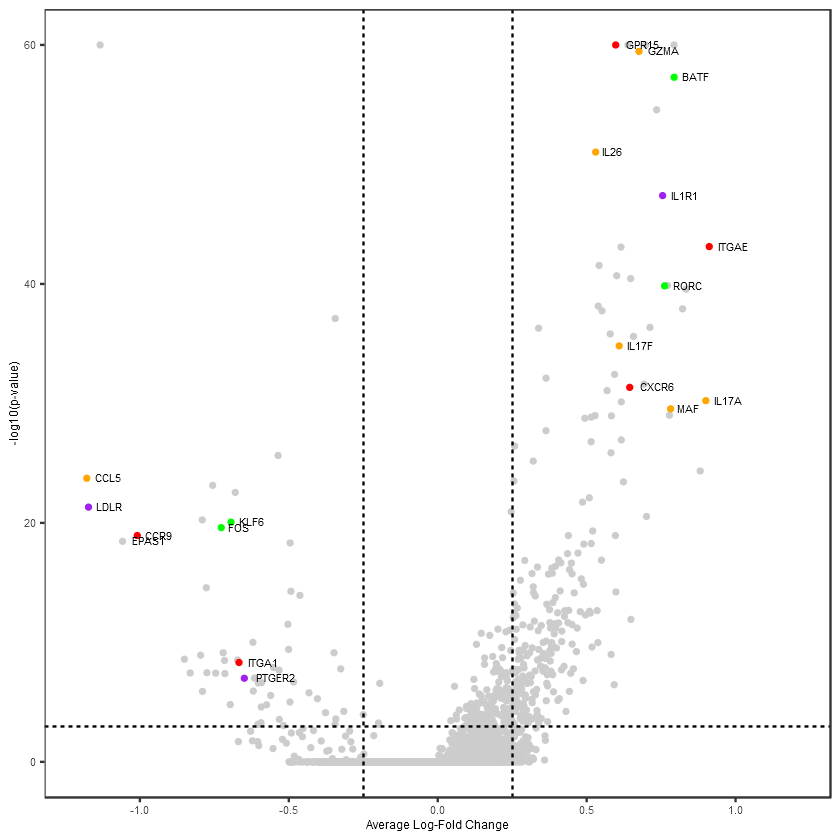

In [13]:
cd4mark = cd4mark_de
cd4show = c("CCR9", 'CCL5', 'PTGER2', 'ITGAE', 'MAF', 'ITGA1', 'KLF6', 'FOS', 'IL1R1', 'BATF', "RORC", 'IL26', 'IL17A', 'EPAS1', 'LDLR', 'GPR15', 'GZMA', 
           'CXCR6', 'IL17F')
cd4mark$label = NA
cd4mark[cd4show,'label'] = cd4show
cd4mark$color = 'zgene'
#cd4mark$color[cd4mark$p_val_adj < 0.001] = 'zsig'
cd4mark$color[cd4mark$label %in% c("CCR9", 'ITGAE', 'ITGA1', 'GPR15', 'CXCR6')] = 'Homing Marker'
cd4mark$color[cd4mark$label %in% c("MAF", 'IL26', 'IL17A', 'CCL5', 'GZMA', 'IL17F')] = 'Cytokine'
cd4mark$color[cd4mark$label %in% c('KLF6', 'BATF', 'RORC', 'FOS')] = 'Transcription Factor'
cd4mark$color[cd4mark$label %in% c('PTGER2', 'IL1R1', 'LDLR', 'IL7R')] = 'Surface Marker'
dotcolors = c('grey80', 'red', 'orange', 'green', 'purple', 'black')
names(dotcolors) = c("zgene", 'Homing Marker', 'Cytokine', "Transcription Factor", 'Surface Marker', 'zsig')
cd4mark$plot = cd4mark$p_val_adj
cd4mark$plot[cd4mark$p_val_adj < 1e-60] = 1e-60
cd4mark = cd4mark[rev(order(cd4mark$color)),]
ggplot(cd4mark, aes(x = avg_logFC, y = -log10(plot), label = label, color = color)) + geom_point(size = 1)+geom_text(color = 'black', size = 2.11667, hjust = -.3) + remove_grid + Axis_themes + 
scale_color_manual(values = dotcolors)  + guides(color = FALSE)+  labs(x = 'Average Log-Fold Change', y = '-log10(p-value)') + geom_hline(yintercept = 3, linetype = 'dashed', size = .5) + geom_vline(xintercept = .25, linetype = 'dashed', size = .5) + 
geom_vline(xintercept = -.25, linetype = 'dashed', size = .5) + scale_x_continuous(limits = c(-1.2, 1.2))
ggsave('cd4volcano.pdf', height = 2.2, width = 2.2, useDingbats = FALSE)
write.csv(cd4mark_de, 'cd4_E_vs_D.csv')

In [14]:
write.csv(cd8mark_de, 'cd8markers_E_vs_D.csv')

Warning message:
"Removed 3 rows containing missing values (geom_point)."Warning message:
"Removed 4794 rows containing missing values (geom_text)."

Warning message:
"Removed 3 rows containing missing values (geom_point)."Warning message:
"Removed 4794 rows containing missing values (geom_text)."

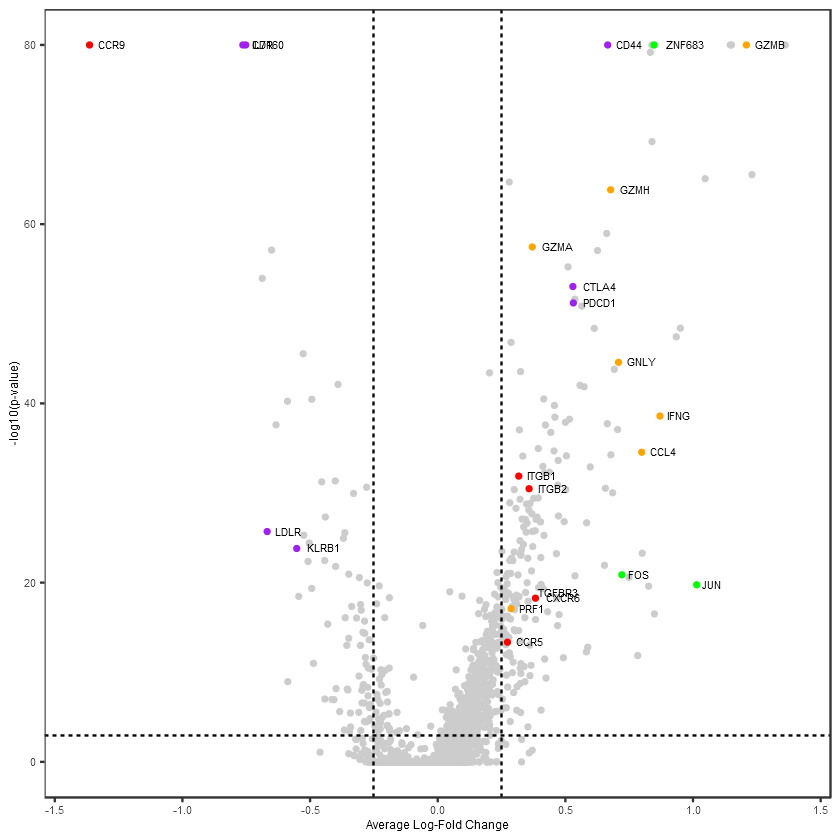

In [15]:
genes = c("ZNF683", 'GZMB', 'CCR9', 'ILR7', 'GZMH', 'CTLA4', "CD44", 'PDCD1', 'IFNG', 'GZMA', 'GNLY', 'CCL4', 'ITGB2', 'ITGB1', 'KLRB1', 'JUN', 'FOS', 'TGFBR3', 'CXCR6', 'PRF1',
         "CCR5",  'IL7R', 'CD160', 'LDLR')
cd8mark = cd8mark_de
cd8mark$label = NA
cd8mark[genes,'label'] = genes
cd8mark$color = 'zgene'
cd8mark$color[cd8mark$label %in% c('CCR9', 'ITGB2', 'ITGB1', 'CXCR6', 'CCR5')] = 'Homing Marker'
cd8mark$color[cd8mark$label %in% c('GZMB', 'GZMH', 'IFNG', 'GZMA', 'GNLY', "CCL4", 'PRF1')] = 'Cytokine'
cd8mark$color[cd8mark$label %in% c('ZNF683', 'JUN', 'FOS')] = 'Transcription Factor'
cd8mark$color[cd8mark$label %in% c('IL7R', 'CTLA4', 'CD44', 'PDCD1', 'KLRB1', 'TGFBR6', 'CD160', 'IL7R', 'LDLR')] = 'Surface Marker'
dotcolors = c('grey80', 'red', 'orange', 'green', 'purple')
names(dotcolors) = c("zgene", 'Homing Marker', 'Cytokine', "Transcription Factor", 'Surface Marker')
cd8mark$plot = cd8mark$p_val_adj
cd8mark$plot[cd8mark$p_val_adj < 1e-80] = 1e-80
cd8mark = cd8mark[rev(order(cd8mark$color)),]
ggplot(cd8mark, aes(x = avg_logFC, y = -log10(plot), label = label, color = color)) + geom_point(size = 1)+geom_text(color = 'black', size = 2.11667, hjust = -.3) +remove_grid+ Axis_themes +
scale_color_manual(values = dotcolors)  + guides(color = FALSE)+  labs(x = 'Average Log-Fold Change', y = '-log10(p-value)') + guides(color = FALSE)  + geom_hline(yintercept = 3, linetype = 'dashed', size = .5) +
geom_vline(xintercept = .25, linetype = 'dashed', size = .5) + 
geom_vline(xintercept = -.25, linetype = 'dashed', size = .5) + scale_x_continuous(limits = c(-1.4, 1.4))
ggsave('cd8volcano.pdf', height = 2.2, width = 2.2, useDingbats = FALSE)
write.csv(cd8mark_de, 'cd8_E_vs_D.csv')

Warning message:
"Removed 5404 rows containing missing values (geom_text)."

Warning message:
"Removed 5404 rows containing missing values (geom_text)."

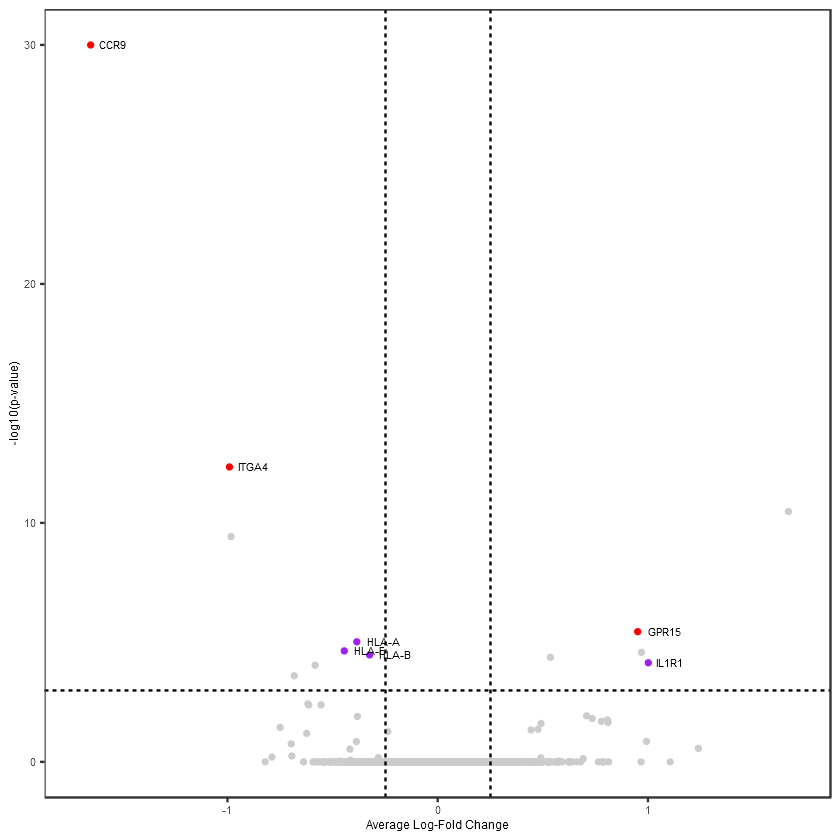

In [16]:
genes = c("CCR9", 'ITGA4', 'GPR15', 'IL1R1', 'HLA-A', 'HLA-E', 'HLA-B', 'IL1R1')
tregmark = tregmark_de
tregmark$label = NA
tregmark[genes,'label'] = genes
tregmark$color = 'zgene'
tregmark$color[tregmark$label %in% c('CCR9', 'ITGA4', 'GPR15' )] = 'Homing Marker'
tregmark$color[tregmark$label %in% c()] = 'Cytokine'
tregmark$color[tregmark$label %in% c()] = 'Transcription Factor'
tregmark$color[tregmark$label %in% c('IL1R1', 'HLA-A', 'HLA-E', 'HLA-B')] = 'Surface Marker'
dotcolors = c('grey80', 'red', 'orange', 'green', 'purple')
names(dotcolors) = c("zgene", 'Homing Marker', 'Cytokine', "Transcription Factor", 'Surface Marker')
tregmark$plot = tregmark$p_val_adj
tregmark$plot[tregmark$p_val_adj < 1e-30] = 1e-30
tregmark = tregmark[rev(order(tregmark$color)),]
ggplot(tregmark, aes(x = avg_logFC, y = -log10(plot), label = label, color = color)) + geom_point(size = 1)+geom_text(color = 'black', size = 2.11667, hjust = -.3) +remove_grid+ Axis_themes +
scale_color_manual(values = dotcolors)  + guides(color = FALSE)+  labs(x = 'Average Log-Fold Change', y = '-log10(p-value)') + guides(color = FALSE)  + geom_hline(yintercept = 3, linetype = 'dashed', size = .5) + 
geom_vline(xintercept = .25, linetype = 'dashed', size = .5) + 
geom_vline(xintercept = -.25, linetype = 'dashed', size = .5) + scale_x_continuous(limits = c(-1.7, 1.7))
ggsave('tregvolcano.pdf', height = 2.2, width = 2.2, useDingbats = FALSE)
write.csv(tregmark_de, 'treg_vs_D.csv')

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 4038 rows containing missing values (geom_text)."

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 4038 rows containing missing values (geom_text)."

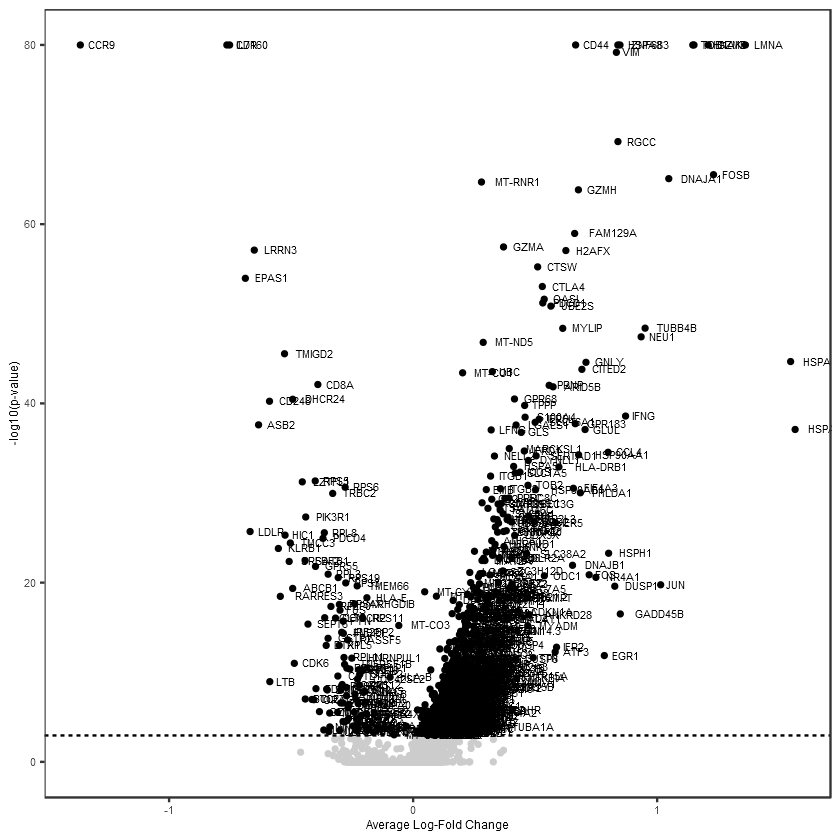

In [17]:
# this is the treg plot
genes = c("ZNF683", 'GZMB', 'CCR9', 'ILR7', 'GZMH', 'CTLA4', "CD44", 'PDCD1', 'IFNG', 'GZMA', 'GNLY', 'CCL4', 'ITGB2', 'ITGB1', 'KLRB1', 'JUN', 'FOS', 'TGFBR3', 'CXCR6', 'PRF1', 'TNFSF10', 
         "CCR5", 'MAF', 'IL7R', 'CD160', 'LDLR')
genes = rownames(cd8mark)[cd8mark$p_val_adj < 1e-3]
genes = genes[!is.na(genes)]
cd8mark$label = NA
cd8mark[genes,'label'] = genes
cd8mark$color = 'zgene'
cd8mark$color[cd8mark$p_val_adj < 1e-3] = 'other'
dotcolors = c('grey80', 'red', 'orange', 'green', 'purple', 'black')
names(dotcolors) = c("zgene", 'Homing Marker', 'Cytokine', "Transcription Factor", 'Surface Marker', 'other')
cd8mark$plot = cd8mark$p_val_adj
cd8mark$plot[cd8mark$p_val_adj < 1e-80] = 1e-80
cd8mark = cd8mark[rev(order(cd8mark$color)),]
ggplot(cd8mark, aes(x = avg_logFC, y = -log10(plot), label = label, color = color)) + geom_point(size = 1)+geom_text(color = 'black', size = 2.11667, hjust = -.3) +remove_grid+ Axis_themes +
scale_color_manual(values = dotcolors)  + guides(color = FALSE)+  labs(x = 'Average Log-Fold Change', y = '-log10(p-value)') + guides(color = FALSE)  + geom_hline(yintercept = 3, linetype = 'dashed')
ggsave('cd8volcano.pdf', height = 2.7, width = 2.7, useDingbats = FALSE)
#write.csv(cd8mark, 'cd8_E_vs_D.csv')

In [18]:
tcr@meta.data$plot_cluster = NA
tcr@meta.data[tcelle@cell.names, 'plot_cluster'] = tcelle@meta.data$plot_cluster
tcr@meta.data[tcelld@cell.names, 'plot_cluster'] = tcelld@meta.data$plot_cluster

In [19]:
genelists = read.table('innate_lists.csv', stringsAsFactors = FALSE, header = 1, row.names = 1, sep = ',')
head(genelists)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,type,gene
KLRB1,1.042097e-57,0.6576709,0.994,0.846,3.493213e-53,iNKT,KLRB1
TRAC,1.596590e-39,0.6855182,0.877,0.621,5.351930e-35,iNKT,TRAC
GZMK,4.255526e-32,0.5953897,0.714,0.365,1.426495e-27,iNKT,GZMK
IL7R,2.028471e-30,0.5683303,0.828,0.550,6.799638e-26,iNKT,IL7R
TRDC,2.385523e-28,-1.4148008,0.169,0.458,7.996513e-24,iNKT,TRDC
KLRD1,3.336465e-26,-0.9266543,0.338,0.611,1.118416e-21,iNKT,KLRD1


In [20]:
n = 30
for (a in unique(genelists$type)) {
    print(a)
    genes = genelists %>% filter(type == a, avg_logFC > 0) %>% top_n(n, wt = desc(p_val))
    genes = genes$gene[genes$p_val_adj < 0.001]
    print(genes)
    tcelle = AddModuleScore(tcelle, genes.list = list(genes = genes), enrich.name = a)
    tcelld = AddModuleScore(tcelld, genes.list = list(genes = genes), enrich.name = a)

    
}

[1] "iNKT"
 [1] "KLRB1"      "TRAC"       "GZMK"       "IL7R"       "LTB"       
 [6] "CD40LG"     "TRGC2"      "IL32"       "TRAV4"      "CLECL1"    
[11] "S100B"      "CCR2"       "DPP4"       "DUSP1"      "CEBPD"     
[16] "AC092580.4" "ZBTB16"     "LYAR"       "PHACTR2"    "TMEM14C"   
[21] "SPOCK2"     "CD6"        "GPR171"    
[1] "NK"
 [1] "FCER1G" "KLRF1"  "GZMB"   "TYROBP" "SPON2"  "GNLY"   "FGFBP2" "NKG7"  
 [9] "KLRD1"  "IGFBP7" "CLIC3"  "FCGR3A" "PRF1"   "SRGN"   "MYOM2"  "B2M"   
[17] "AKR1C3" "PLAC8"  "CST7"   "CHST2"  "CD7"    "CCL4"   "SH2D1B" "CTSW"  
[25] "ID2"    "HOPX"   "PFN1"   "HAVCR2" "GZMA"   "HLA-C" 
[1] "vd1"
 [1] "TRDC"     "KLRC2"    "TIGIT"    "CCL5"     "GZMH"     "CMC1"    
 [7] "TMSB4X"   "NKG7"     "CCL4"     "KLRD1"    "GNLY"     "HLA-DRB1"
[13] "CCL3"     "FCGR3A"   "CD3D"     "TRGC1"    "FCRL6"    "KLRF1"   
[19] "GCSAM"    "TYROBP"   "TRG-AS1"  "ZEB2"     "GZMB"     "IFITM2"  
[25] "IL32"     "SRGN"     "PFN1"     "ITGB2"    "LITAF"    "IKZF2"   
[

In [21]:

cols = c('plot_cluster', 'iNKT1', 'NK1', 'MAIT1', 'gd1','ab1')
data1 = tcelle@meta.data[,c(cols)]
data2 = tcelld@meta.data[,c(cols)]
data = rbind(data1, data2)

data = data %>% group_by(plot_cluster) %>% summarize_all(.funs = mean) %>% as.data.frame()
rownames(data) = data$plot_cluster
data = data[,-1]
data = t(data)
data = scale(data)
rownames(data) = c('iNKT', 'NK', 'MAIT', 'GammaDelta', 'AlphaBeta')
data = data[,c('E1', 'D2', 'E2', 'E5', 'D1', 'E3', 'D5', 'E6', 'E4',  'D3', 'D4', 'D6')]
             pheatmap(data, color =viridis(20), cluster_cols = FALSE, fontsize = 6, height = 1.5, width = 3, filename = 'innate.pdf', treeheight_row = 5, angle_col = 0, border_color = NA)

In [22]:
set.seed(2)
th2genes = list()
th1markers = list()
th2markers = list()
th17markers = list()
tfhmarkers = list()
tregmarkers = list()
th2genes[[1]] = #c("IL9", "IL17RB", 'IL5', 'CDO1', 'IL1RL1', 'CYP4X1', 'PLA2G16', 'IL31', 'IL13', 'IL4', 'IL3', 'CDH1',
            #'TRIM16', 'FGF6', 'PCDHB6', 'PTGS2', 'KLRB1', 'PPARG')
c("HPGDS", 'CRLF2', 'PPARG', 'IL1RL1', 'PTGS2', 'IL17RB', 'KLRB1')
th1markers[[1]] = c("IFNG", 'TBX21', 'CXCR3', 'GZMB', 'TNF')
th2markers[[1]] = c('IL4', 'IL13', 'IL5', 'IL9')
th17markers[[1]] = c("IL17A",'RORC', 'CCR6', 'IL23R')
tfhmarkers[[1]] = c('CXCR5', 'ICOS', 'PDCD1', 'IL21')
tregmarkers[[1]] =c("FOXP3", 'IL10', 'IL2RA', 'TGFB1')
#tfh13genes[[1]]= genes = c("SRGN", 'FURIN', 'FXYD5', 'GADD45B', 'CD3G', 'RRM2', 'BTG2', 'CCR2', 'JUNB', 'IL13')

tcell_all = MergeSeurat(tcelle, tcelld)
tcell_all = AddModuleScore(tcell_all, th2genes, enrich.name = 'th2a')
tcell_all = AddModuleScore(tcell_all, th1markers, enrich.name = 'th1')
tcell_all = AddModuleScore(tcell_all, th2markers, enrich.name = 'th2')
tcell_all = AddModuleScore(tcell_all, th17markers, enrich.name = 'th17')
tcell_all = AddModuleScore(tcell_all, tfhmarkers, enrich.name = 'tfh')
tcell_all = AddModuleScore(tcell_all, tregmarkers, enrich.name = 'treg')


In [23]:

df = tcell_all@meta.data %>% group_by(plot_cluster) %>% summarize(th1 = mean(th11), 
                                                        th2 = mean(th21), 
                                                        th17 = mean(th171), 
                                                        treg = mean(treg1),
                                                        #tfh = mean(tfh1)
                                                                 ) %>% filter(!is.na(plot_cluster)) %>% as.data.frame() #%>%
#filter(!plot_cluster %in% c('D6', 'D4', 'D3', 'E4'))

rownames(df) = paste(df$plot_cluster)

meta = df[,c(1)]
df = df[,-c(1)]
df = t(df)

df = scale(df)
df = df[,c('E1', 'D2', 'E2', 'E5', 'D1', 'E3', 'D5', 'E6', 'E4',  'D3', 'D4', 'D6')]
rownames(df) = c("Th1", 'Th2', 'Th17', 'Treg')
pheatmap(df, cluster_rows = FALSE, color = viridis(100),  cluster_cols = TRUE, fontsize = 6, height = 1.5, width = 3, filename = 'th.pdf', treeheight_row = 5, angle_col = 0, border_color = NA)